In [2]:
# Cell 1: Import required libraries
! pip install chembl_webresource_client
import pandas as pd
import numpy as np
from chembl_webresource_client.new_client import new_client
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import Draw


  Using cached chembl_webresource_client-0.10.9-py3-none-any.whl.metadata (1.4 kB)
  Using cached requests_cache-1.2.1-py3-none-any.whl.metadata (9.9 kB)
  Using cached easydict-1.13-py3-none-any.whl.metadata (4.2 kB)
  Using cached cattrs-24.1.2-py3-none-any.whl.metadata (8.4 kB)
  Using cached url_normalize-1.4.3-py2.py3-none-any.whl.metadata (3.1 kB)
Using cached chembl_webresource_client-0.10.9-py3-none-any.whl (55 kB)
Using cached requests_cache-1.2.1-py3-none-any.whl (61 kB)
Using cached easydict-1.13-py3-none-any.whl (6.8 kB)
Using cached cattrs-24.1.2-py3-none-any.whl (66 kB)
Using cached url_normalize-1.4.3-py2.py3-none-any.whl (6.8 kB)


In [4]:
# Cell 2: Set up ChEMBL client
client = new_client

In [7]:
# Cell 3: Search for CLC transporters and save results to CSV
import pandas as pd
from chembl_webresource_client.new_client import new_client

# Set up ChEMBL client
client = new_client

# Search for CLC transporters
targets = client.target.search('CLC transporter')

# Create a list to store the target information
target_list = []

# Iterate through the targets and store relevant information
for target in targets:
    target_info = {
        'pref_name': target['pref_name'],
        'target_chembl_id': target['target_chembl_id'],
        'target_type': target['target_type'],
        'organism': target['organism']
    }
    target_list.append(target_info)
    print(f"Target: {target['pref_name']}, ChEMBL ID: {target['target_chembl_id']}")

# Create a DataFrame from the target list
targets_df = pd.DataFrame(target_list)

# Save the DataFrame to a CSV file
csv_filename = 'clc_transporters.csv'
targets_df.to_csv(csv_filename, index=False)
print(f"CLC transporter information saved to {csv_filename}")

# Display the first few rows of the DataFrame
print(targets_df.head())

# Print some statistics about the dataset
print(f"\nTotal number of CLC transporters found: {len(targets_df)}")
print(f"Number of unique organisms: {targets_df['organism'].nunique()}")
print(f"\nOrganism distribution:\n{targets_df['organism'].value_counts()}")
print(f"\nTarget type distribution:\n{targets_df['target_type'].value_counts()}")


Target: H(+)/Cl(-) exchange transporter 3, ChEMBL ID: CHEMBL2401603
Target: Chloride transport protein 6, ChEMBL ID: CHEMBL2176794
Target: Chloride channel protein 2, ChEMBL ID: CHEMBL1628478
Target: CLC chloride channel protein, ChEMBL ID: CHEMBL2268011
Target: Chloride channel protein 1, ChEMBL ID: CHEMBL4524038
Target: Calcium-activated chloride channel, ChEMBL ID: CHEMBL2364708
Target: Equilibrative nucleoside transporter 1, ChEMBL ID: CHEMBL1997
Target: Hexose transporter 1, ChEMBL ID: CHEMBL4697
Target: Transporter, ChEMBL ID: CHEMBL6184
Target: Transporter, ChEMBL ID: CHEMBL6197
Target: Monoamine transporters; Norepininephrine & dopamine, ChEMBL ID: CHEMBL2095175
Target: Transporter, ChEMBL ID: CHEMBL3886063
Target: Dopamine transporter, ChEMBL ID: CHEMBL238
Target: Synaptic vesicular amine transporter, ChEMBL ID: CHEMBL1893
Target: Synaptic vesicular amine transporter, ChEMBL ID: CHEMBL4828
Target: Dopamine transporter, ChEMBL ID: CHEMBL2799
Target: Synaptic vesicular amine tra

In [10]:
# Cell 1: Install required libraries
!pip install seaborn pandas matplotlib rdkit-pypi chembl_webresource_client


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [11]:
# Cell 1: Import required libraries and load data
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem, Descriptors, PandasTools
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt

from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import Descriptors
from chembl_webresource_client.new_client import new_client


In [12]:
# Try importing seaborn, use a fallback if it fails
try:
    import seaborn as sns
    seaborn_available = True
except ImportError:
    print("Seaborn import failed. Will use matplotlib for visualizations.")
    seaborn_available = False

# Load the CSV file
clc_transporters = pd.read_csv('clc_transporters.csv')


In [13]:
print(clc_transporters['target_type'].value_counts())

target_type
SINGLE PROTEIN                 433
PROTEIN COMPLEX                 19
PROTEIN FAMILY                  14
SELECTIVITY GROUP                9
PROTEIN COMPLEX GROUP            4
UNKNOWN                          2
PROTEIN-PROTEIN INTERACTION      1
CHIMERIC PROTEIN                 1
Name: count, dtype: int64


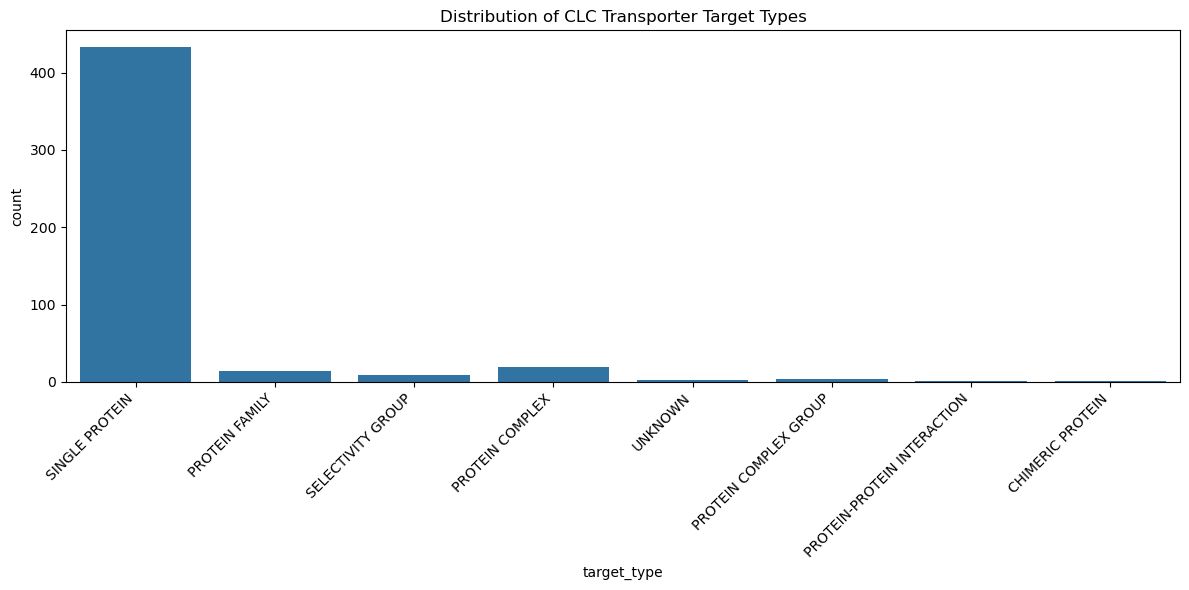

In [14]:
# Cell 3: Visualize the distribution of target types
plt.figure(figsize=(12, 6))
if seaborn_available:
    sns.countplot(x='target_type', data=clc_transporters)
else:
    clc_transporters['target_type'].value_counts().plot(kind='bar')
plt.title('Distribution of CLC Transporter Target Types')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [15]:
# Cell 4: Function to get a representative molecule for each target
def get_representative_molecule(target_chembl_id):
    client = new_client
    activities = client.activity.filter(target_chembl_id=target_chembl_id)
    df = pd.DataFrame.from_dict(activities)
    if not df.empty and 'canonical_smiles' in df.columns:
        return df['canonical_smiles'].iloc[0]
    return None


In [16]:
# Cell 5: Get representative molecules for each target type
representative_molecules = {}
for target_type in clc_transporters['target_type'].unique():
    target = clc_transporters[clc_transporters['target_type'] == target_type].iloc[0]
    smiles = get_representative_molecule(target['target_chembl_id'])
    if smiles:
        representative_molecules[target_type] = smiles

In [17]:
# Cell 5: Save representative molecules to file

import pickle

# Check if the file already exists
import os

file_path = 'representative_molecules.pkl'

if os.path.exists(file_path):
    # Load the data from the file if it exists
    with open(file_path, 'rb') as f:
        representative_molecules = pickle.load(f)
    print("Loaded representative molecules from file.")
else:
    # If the file doesn't exist, run the time-consuming process
    representative_molecules = {}
    for target_type in clc_transporters['target_type'].unique():
        target = clc_transporters[clc_transporters['target_type'] == target_type].iloc[0]
        smiles = get_representative_molecule(target['target_chembl_id'])
        if smiles:
            representative_molecules[target_type] = smiles
    
    # Save the data to a file
    with open(file_path, 'wb') as f:
        pickle.dump(representative_molecules, f)
    print("Saved representative molecules to file.")

# Print the results
for target_type, smiles in representative_molecules.items():
    print(f"{target_type}: {smiles}")

Saved representative molecules to file.
SINGLE PROTEIN: CC(=O)O[C@@H]1C[C@H](c2ccc(=O)oc2)[C@@]2(C)CC[C@H]3[C@@H](CC[C@@H]4C[C@@H](O)CC[C@@]43C)[C@@]12O
PROTEIN FAMILY: Cn1nc(COc2cccc(F)c2)c2c1CCN(C(=O)Nc1ccc(Cl)cc1)C2
SELECTIVITY GROUP: COC(=O)[C@H]1CN(C)CC[C@@H]1c1ccc(Cl)cc1
PROTEIN COMPLEX: N=C(NCCc1c[nH]c2ccccc12)NS(=O)(=O)c1cc(F)ccc1F
UNKNOWN: CCN(CCCNCCCN)Cc1c2ccccc2cc2ccccc12.Cl.Cl.Cl
PROTEIN COMPLEX GROUP: C[C@]12CC/C(=N\OCCN)C[C@@H]1C(O)C[C@@H]1[C@@H]2CC[C@]2(C)C(O)CC[C@@H]12
PROTEIN-PROTEIN INTERACTION: COc1ccc(C(=O)CSc2nnc(NC(=O)C3CC(=O)N(c4ccccc4C)C3)s2)cc1
CHIMERIC PROTEIN: C[C@H]1Oc2cc(cnc2N)-c2c(nn(C)c2C#N)CN(C)C(=O)c2ccc(F)cc21


SINGLE PROTEIN: CC(=O)O[C@@H]1C[C@H](c2ccc(=O)oc2)[C@@]2(C)CC[C@H]3[C@@H](CC[C@@H]4C[C@@H](O)CC[C@@]43C)[C@@]12O
PROTEIN FAMILY: Cn1nc(COc2cccc(F)c2)c2c1CCN(C(=O)Nc1ccc(Cl)cc1)C2
SELECTIVITY GROUP: COC(=O)[C@H]1CN(C)CC[C@@H]1c1ccc(Cl)cc1
PROTEIN COMPLEX: N=C(NCCc1c[nH]c2ccccc12)NS(=O)(=O)c1cc(F)ccc1F
UNKNOWN: CCN(CCCNCCCN)Cc1c2ccccc2cc2ccccc12.Cl.Cl.Cl
PROTEIN COMPLEX GROUP: C[C@]12CC/C(=N\OCCN)C[C@@H]1C(O)C[C@@H]1[C@@H]2CC[C@]2(C)C(O)CC[C@@H]12
PROTEIN-PROTEIN INTERACTION: COc1ccc(C(=O)CSc2nnc(NC(=O)C3CC(=O)N(c4ccccc4C)C3)s2)cc1
CHIMERIC PROTEIN: C[C@H]1Oc2cc(cnc2N)-c2c(nn(C)c2C#N)CN(C)C(=O)c2ccc(F)cc21


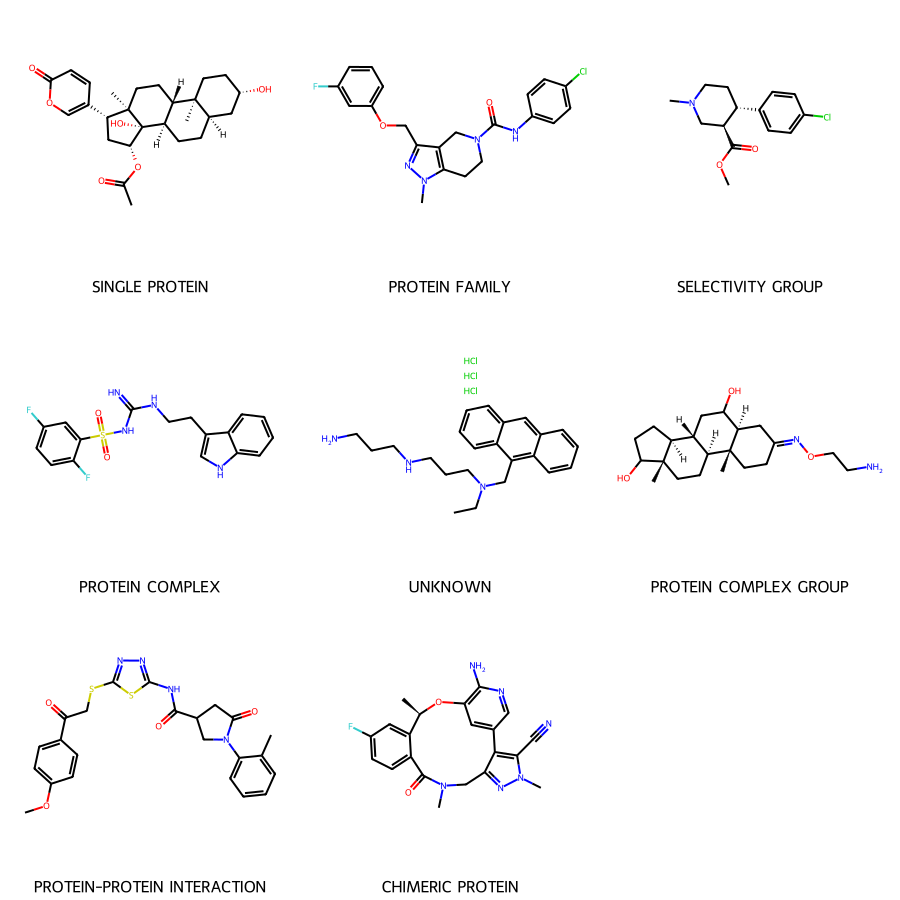

                               MolWt  MolLogP  NumHDonors  NumHAcceptors  \
SINGLE PROTEIN               444.568  3.78350         2.0            6.0   
PROTEIN FAMILY               414.868  4.38180         1.0            4.0   
SELECTIVITY GROUP            267.756  2.54830         0.0            3.0   
PROTEIN COMPLEX              378.404  2.49147         4.0            3.0   
UNKNOWN                      458.905  5.40880         2.0            3.0   
PROTEIN COMPLEX GROUP        364.530  2.69210         3.0            5.0   
PROTEIN-PROTEIN INTERACTION  482.587  3.82172         1.0            8.0   
CHIMERIC PROTEIN             406.421  2.80068         1.0            7.0   

                             NumRotatableBonds    TPSA  
SINGLE PROTEIN                             2.0   96.97  
PROTEIN FAMILY                             4.0   59.39  
SELECTIVITY GROUP                          2.0   29.54  
PROTEIN COMPLEX                            5.0   97.84  
UNKNOWN                       

In [18]:
import pickle

# Load the data
with open('representative_molecules.pkl', 'rb') as f:
    representative_molecules = pickle.load(f)

# Now you can use the representative_molecules dictionary
for target_type, smiles in representative_molecules.items():
    print(f"{target_type}: {smiles}")

# You can use this data for further analysis, for example:
from rdkit import Chem
from rdkit.Chem import Draw

# Convert SMILES to RDKit mol objects
mols = [Chem.MolFromSmiles(smiles) for smiles in representative_molecules.values()]
legends = list(representative_molecules.keys())

# Visualize the molecules
img = Draw.MolsToGridImage(mols, molsPerRow=3, subImgSize=(300,300), legends=legends)
display(img)

# Calculate molecular properties
from rdkit.Chem import Descriptors

properties = ['MolWt', 'MolLogP', 'NumHDonors', 'NumHAcceptors', 'NumRotatableBonds', 'TPSA']

def calculate_properties(smiles):
    mol = Chem.MolFromSmiles(smiles)
    return {prop: getattr(Descriptors, prop)(mol) for prop in properties}

property_data = {target_type: calculate_properties(smiles) 
                 for target_type, smiles in representative_molecules.items()}

import pandas as pd

prop_df = pd.DataFrame(property_data).T
print(prop_df)

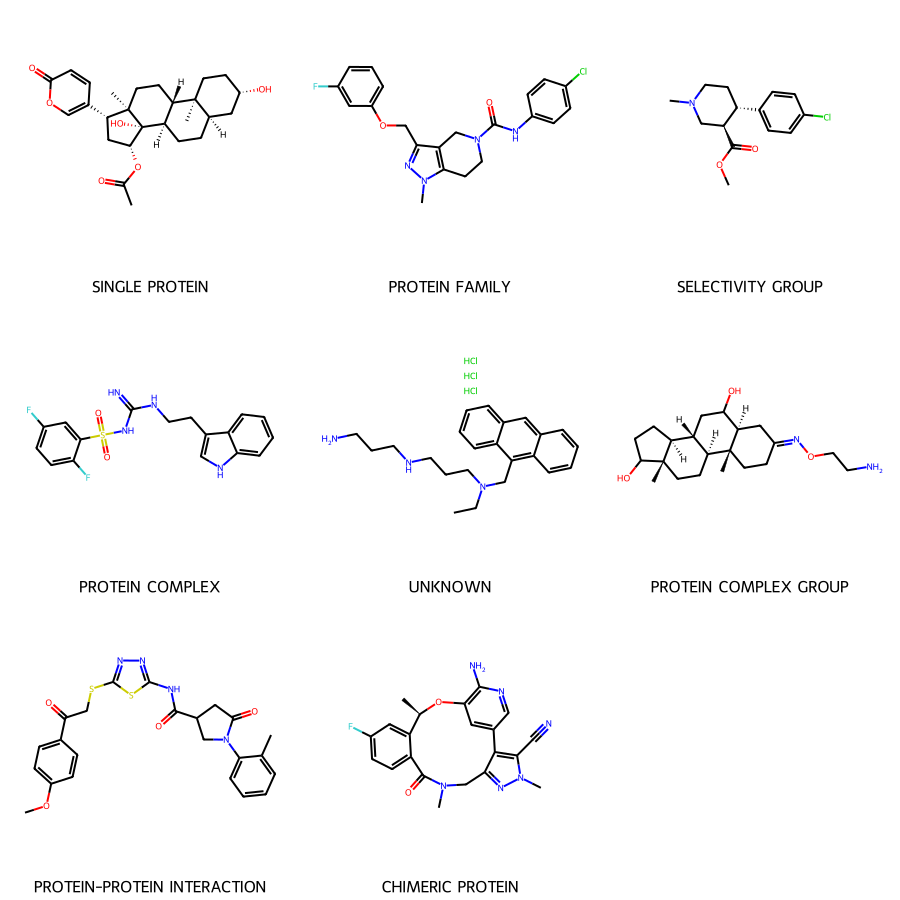

In [20]:
# Cell 6: A different way to visualize the representative molecules without additional data
mols = [Chem.MolFromSmiles(smiles) for smiles in representative_molecules.values()]
legends = list(representative_molecules.keys())

img = Draw.MolsToGridImage(mols, molsPerRow=3, subImgSize=(300,300), legends=legends)
#img.save('representative_molecules.png')
display(img)

In [21]:
# Cell 7: A different way to calculate and compare molecular properties without the visualization aspect
properties = ['MolWt', 'MolLogP', 'NumHDonors', 'NumHAcceptors', 'NumRotatableBonds', 'TPSA']

def calculate_properties(smiles):
    mol = Chem.MolFromSmiles(smiles)
    return {prop: getattr(Descriptors, prop)(mol) for prop in properties}

property_data = {target_type: calculate_properties(smiles) 
                 for target_type, smiles in representative_molecules.items()}

prop_df = pd.DataFrame(property_data).T
print(prop_df)


                               MolWt  MolLogP  NumHDonors  NumHAcceptors  \
SINGLE PROTEIN               444.568  3.78350         2.0            6.0   
PROTEIN FAMILY               414.868  4.38180         1.0            4.0   
SELECTIVITY GROUP            267.756  2.54830         0.0            3.0   
PROTEIN COMPLEX              378.404  2.49147         4.0            3.0   
UNKNOWN                      458.905  5.40880         2.0            3.0   
PROTEIN COMPLEX GROUP        364.530  2.69210         3.0            5.0   
PROTEIN-PROTEIN INTERACTION  482.587  3.82172         1.0            8.0   
CHIMERIC PROTEIN             406.421  2.80068         1.0            7.0   

                             NumRotatableBonds    TPSA  
SINGLE PROTEIN                             2.0   96.97  
PROTEIN FAMILY                             4.0   59.39  
SELECTIVITY GROUP                          2.0   29.54  
PROTEIN COMPLEX                            5.0   97.84  
UNKNOWN                       

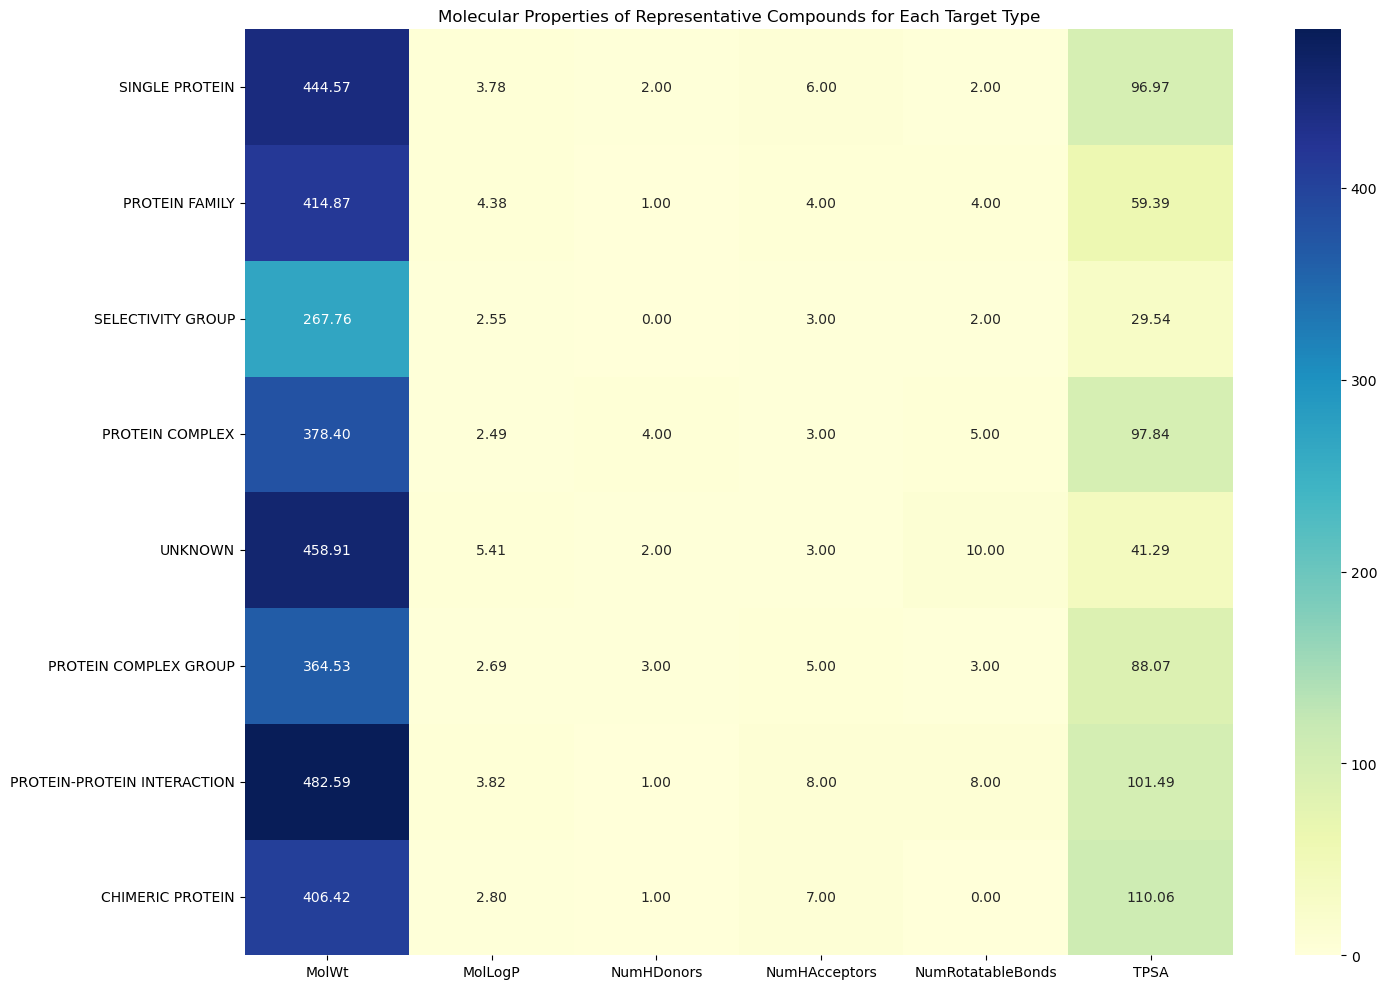

In [22]:
# Cell 8: Visualize molecular properties
plt.figure(figsize=(15, 10))
if seaborn_available:
    sns.heatmap(prop_df, annot=True, cmap='YlGnBu', fmt='.2f')
else:
    plt.imshow(prop_df, cmap='YlGnBu')
    for i in range(len(prop_df.index)):
        for j in range(len(prop_df.columns)):
            plt.text(j, i, f"{prop_df.iloc[i, j]:.2f}", ha='center', va='center')
plt.title('Molecular Properties of Representative Compounds for Each Target Type')
plt.tight_layout()
plt.show()


In [23]:
# Cell 9: Analyze protein complexes
protein_complexes = clc_transporters[clc_transporters['target_type'] == 'PROTEIN COMPLEX GROUP']
print("Protein Complexes:")
print(protein_complexes[['pref_name', 'organism']])


Protein Complexes:
                                  pref_name           organism
403    Sodium/potassium-transporting ATPase       Homo sapiens
436  Sulfonylurea receptors; K-ATP channels       Homo sapiens
449    Sodium/potassium-transporting ATPase         Sus scrofa
450  Sulfonylurea receptors; K-ATP channels  Rattus norvegicus


In [24]:
# Cell 10: Analyze selectivity groups
selectivity_groups = clc_transporters[clc_transporters['target_type'] == 'SELECTIVITY GROUP']
print("\nSelectivity Groups:")
print(selectivity_groups[['pref_name', 'organism']])

#


Selectivity Groups:
                                             pref_name           organism
10   Monoamine transporters; Norepininephrine & dop...  Rattus norvegicus
41        Monoamine transporters; serotonin & dopamine  Rattus norvegicus
42        Monoamine transporters; serotonin & dopamine       Homo sapiens
43   Monoamine transporters; Norepinephrine & serot...  Rattus norvegicus
44   Monoamine transporters; Norepinephrine & dopamine       Homo sapiens
45   Serotonin and norepinephrine transporters (SER...       Homo sapiens
154                    Monocarboxylate transporter 1/4       Homo sapiens
155                    Monocarboxylate transporter 2/3       Homo sapiens
234  Multidrug resistance protein 1/Multidrug resis...       Homo sapiens


In [54]:
# Cell 11: Summary and interpretation
print("""
Summary of CLC Transporter Types:

1. SELECTIVITY GROUP (9):
   These likely represent groups of CLC transporters that are targeted together for selectivity studies.
   They may include multiple related CLC subtypes.

2. PROTEIN COMPLEX GROUP (4):
   These represent CLC transporters that function as multi-subunit complexes.
   They might include heteromeric channels or transporters with auxiliary subunits.

3. UNKNOWN (2):
   These targets have not been fully characterized or classified.

4. PROTEIN-PROTEIN INTERACTION (1):
   This likely represents a specific interaction between a CLC transporter and another protein.
   It could be important for regulation or localization of the transporter.

5. CHIMERIC PROTEIN (1):
   This might be an artificially constructed protein combining parts of different CLC transporters.
   It could be used for studying structure-function relationships.

The molecular property analysis shows variations in properties like molecular weight, 
lipophilicity, and polar surface area among representative compounds for each target type. 
These differences could reflect the diverse mechanisms of action or binding sites 
associated with different types of CLC transporter targets.
""")


Summary of CLC Transporter Types:

1. SELECTIVITY GROUP (9):
   These likely represent groups of CLC transporters that are targeted together for selectivity studies.
   They may include multiple related CLC subtypes.

2. PROTEIN COMPLEX GROUP (4):
   These represent CLC transporters that function as multi-subunit complexes.
   They might include heteromeric channels or transporters with auxiliary subunits.

3. UNKNOWN (2):
   These targets have not been fully characterized or classified.

4. PROTEIN-PROTEIN INTERACTION (1):
   This likely represents a specific interaction between a CLC transporter and another protein.
   It could be important for regulation or localization of the transporter.

5. CHIMERIC PROTEIN (1):
   This might be an artificially constructed protein combining parts of different CLC transporters.
   It could be used for studying structure-function relationships.

The molecular property analysis shows variations in properties like molecular weight, 
lipophilicity, a

In [55]:
# Cell 1: Import required libraries and set up ChEMBL client
import pandas as pd
import numpy as np
from chembl_webresource_client.new_client import new_client
from rdkit import Chem
from rdkit.Chem import Draw, Descriptors
import matplotlib.pyplot as plt
import seaborn as sns

client = new_client


In [56]:
# Cell 2: Try alternative search terms
search_terms = ['fluoride channel', 'fluoride transporter', 'fluoride exporter', 'CLC fluoride']

for term in search_terms:
    print(f"\nSearching for '{term}':")
    targets = client.target.search(term)
    if targets:
        print(f"Found {len(targets)} results.")
        df = pd.DataFrame(targets)
        print("Columns:", df.columns)
        print(df[['pref_name', 'target_type', 'organism']].head())
    else:
        print("No results found.")

#


Searching for 'fluoride channel':
Found 736 results.
Columns: Index(['cross_references', 'organism', 'pref_name', 'score',
       'species_group_flag', 'target_chembl_id', 'target_components',
       'target_type', 'tax_id'],
      dtype='object')
                                       pref_name     target_type  \
0  Voltage-gated potassium channel subunit Kv1.2  SINGLE PROTEIN   
1  Sodium channel protein type III alpha subunit  SINGLE PROTEIN   
2   Sodium channel protein type IX alpha subunit  SINGLE PROTEIN   
3    Sodium channel protein type X alpha subunit  SINGLE PROTEIN   
4  Voltage-gated potassium channel subunit Kv1.1  SINGLE PROTEIN   

            organism  
0       Homo sapiens  
1  Rattus norvegicus  
2  Rattus norvegicus  
3  Rattus norvegicus  
4       Homo sapiens  

Searching for 'fluoride transporter':
Found 479 results.
Columns: Index(['cross_references', 'organism', 'pref_name', 'score',
       'species_group_flag', 'target_chembl_id', 'target_components',
      

In [57]:
# Cell 1: Summary of findings

print("""
Summary of Fluoride Channel Data Exploration:

1. 'fluoride channel' search: 736 results, mostly voltage-gated ion channels
2. 'fluoride transporter' search: 479 results, various transporters including nucleoside and hexose transporters
3. 'fluoride exporter' search: 14 results, including efflux transporters and ABC transporters
4. 'CLC fluoride' search: 6 results, including H+/Cl- exchangers and chloride channel proteins

Key observations:
1. No direct results for Fluc proteins, suggesting they might not be explicitly cataloged in ChEMBL.
2. The 'CLC fluoride' search yielded the most relevant results, including chloride channels which are structurally related to Fluc proteins.
3. The 'fluoride exporter' search, while limited, provided some potential targets related to ion export.

""")


Summary of Fluoride Channel Data Exploration:

1. 'fluoride channel' search: 736 results, mostly voltage-gated ion channels
2. 'fluoride transporter' search: 479 results, various transporters including nucleoside and hexose transporters
3. 'fluoride exporter' search: 14 results, including efflux transporters and ABC transporters
4. 'CLC fluoride' search: 6 results, including H+/Cl- exchangers and chloride channel proteins

Key observations:
1. No direct results for Fluc proteins, suggesting they might not be explicitly cataloged in ChEMBL.
2. The 'CLC fluoride' search yielded the most relevant results, including chloride channels which are structurally related to Fluc proteins.
3. The 'fluoride exporter' search, while limited, provided some potential targets related to ion export.




In [58]:
# Cell 2: Define our analysis strategy

print("""
Analysis Strategy:

1. Focus on CLC (Chloride Channel) proteins:
   - These are structurally related to Fluc proteins and may provide insights into fluoride transport mechanisms.
   - We'll analyze the 6 results from the 'CLC fluoride' search in detail.

2. Investigate fluoride exporters:
   - The 14 results from 'fluoride exporter' search may include proteins involved in fluoride export.
   - We'll analyze these targets and their associated compounds.

3. Broaden the analysis to include general chloride channels:
   - Given the structural similarity between chloride and fluoride ions, chloride channel inhibitors might provide insights into potential fluoride channel modulators.

4. Compound analysis:
   - We'll retrieve compounds associated with the identified targets.
   - Analyze their chemical properties and structural features.
   - Look for common motifs that might be relevant to fluoride interaction.

5. Literature-based curation:
   - Supplement our ChEMBL data with information from primary literature, especially papers from Chris Miller's lab on Fluc proteins.
   - Manually curate a dataset of known Fluc inhibitors or modulators.

6. Structural analysis:
   - If available, we'll obtain protein structures for the identified channels/transporters.
   - Compare these structures to known Fluc protein structures to identify common features that might be involved in fluoride transport.
""")


Analysis Strategy:

1. Focus on CLC (Chloride Channel) proteins:
   - These are structurally related to Fluc proteins and may provide insights into fluoride transport mechanisms.
   - We'll analyze the 6 results from the 'CLC fluoride' search in detail.

2. Investigate fluoride exporters:
   - The 14 results from 'fluoride exporter' search may include proteins involved in fluoride export.
   - We'll analyze these targets and their associated compounds.

3. Broaden the analysis to include general chloride channels:
   - Given the structural similarity between chloride and fluoride ions, chloride channel inhibitors might provide insights into potential fluoride channel modulators.

4. Compound analysis:
   - We'll retrieve compounds associated with the identified targets.
   - Analyze their chemical properties and structural features.
   - Look for common motifs that might be relevant to fluoride interaction.

5. Literature-based curation:
   - Supplement our ChEMBL data with informatio

In [59]:
# Cell 2: Retrieve and explore data for CLC fluoride targets

clc_targets = client.target.search('CLC fluoride')
clc_targets_df = pd.DataFrame(clc_targets)

print("Detailed information for CLC fluoride targets:")
for index, row in clc_targets_df.iterrows():
    print(f"\nTarget: {row['pref_name']}")
    print(f"ChEMBL ID: {row['target_chembl_id']}")
    print(f"Type: {row['target_type']}")
    print(f"Organism: {row['organism']}")
    
    # Retrieve associated compounds
    activities = client.activity.filter(target_chembl_id=row['target_chembl_id'])
    compounds_df = pd.DataFrame(activities)
    if not compounds_df.empty:
        print(f"Number of associated compounds: {len(compounds_df)}")
        print("Columns in the compounds dataframe:")
        print(compounds_df.columns)
        print("\nData types of columns:")
        print(compounds_df.dtypes)
        print("\nSample data (first 5 rows):")
        print(compounds_df.head())
    else:
        print("No associated compounds found.")

Detailed information for CLC fluoride targets:

Target: H(+)/Cl(-) exchange transporter 3
ChEMBL ID: CHEMBL2401603
Type: SINGLE PROTEIN
Organism: Homo sapiens
Number of associated compounds: 23
Columns in the compounds dataframe:
Index(['action_type', 'activity_comment', 'activity_id', 'activity_properties',
       'assay_chembl_id', 'assay_description', 'assay_type',
       'assay_variant_accession', 'assay_variant_mutation', 'bao_endpoint',
       'bao_format', 'bao_label', 'canonical_smiles', 'data_validity_comment',
       'data_validity_description', 'document_chembl_id', 'document_journal',
       'document_year', 'ligand_efficiency', 'molecule_chembl_id',
       'molecule_pref_name', 'parent_molecule_chembl_id', 'pchembl_value',
       'potential_duplicate', 'qudt_units', 'record_id', 'relation', 'src_id',
       'standard_flag', 'standard_relation', 'standard_text_value',
       'standard_type', 'standard_units', 'standard_upper_value',
       'standard_value', 'target_chembl_i

# Analysis of CLC Fluoride Targets and Associated Compounds

## 1. Overview of Targets

We found 6 targets related to CLC fluoride channels:

1. H(+)/Cl(-) exchange transporter 3 (CHEMBL2401603) - Human
2. Chloride channel protein 2 (CHEMBL1628478) - Human
3. CLC chloride channel protein (CHEMBL2268011) - C. elegans
4. Chloride channel protein 1 (CHEMBL4524038) - Rat
5. Chloride transport protein 6 (CHEMBL2176794) - Mouse
6. Calcium-activated chloride channel (CHEMBL2364708) - Human

## 2. Associated Compounds

- H(+)/Cl(-) exchange transporter 3: 23 compounds
- Chloride channel protein 2: No associated compounds
- CLC chloride channel protein: 1 compound
- Chloride channel protein 1: 1 compound
- Chloride transport protein 6: 2 compounds
- Calcium-activated chloride channel: 1 compound

## 3. Data Structure

The compound data includes a wide range of information:
- Activity measurements (e.g., IC50, inhibition percentage)
- Assay details
- Molecule identifiers and SMILES
- Target information

## 4. Key Observations

1. Limited data: Most targets have very few associated compounds, with H(+)/Cl(-) exchange transporter 3 being the exception.

2. Diverse activity types: The 'standard_type' column includes various activity measurements, which may require different analysis approaches.

3. Missing numeric data: The 'pchembl_value' column is of type 'object', suggesting it may contain non-numeric or missing data.

4. Species diversity: The targets span multiple species (human, rat, mouse, C. elegans), which could provide insights into evolutionary conservation of CLC channels.

5. Protein family: The calcium-activated chloride channel is classified as a protein family, which might include multiple related proteins.

## 5. Implications for Analysis

1. Focus on H(+)/Cl(-) exchange transporter 3: With 23 compounds, this target provides the most data for analysis.

2. Data preprocessing: We'll need to carefully process the 'standard_value' and other numeric columns to handle potential non-numeric entries.

3. Cross-species comparison: We could investigate whether compounds active against one species' CLC channel show activity across other species.

4. Integration with literature data: Given the limited data in ChEMBL, we should supplement our analysis with data from primary literature, especially for targets with few or no associated compounds.

5. Structural analysis: We can use the SMILES data to analyze the structural features of active compounds, particularly for H(+)/Cl(-) exchange transporter 3.

## 6. Next Steps

1. Detailed analysis of compounds associated with H(+)/Cl(-) exchange transporter 3.
2. Structural comparison of active compounds across different CLC targets.
3. Investigation of assay types and conditions to understand the context of the activity data.
4. Literature review to supplement ChEMBL data, especially for targets with limited compound data.
5. Consider broadening the search to include other chloride channels or transporters that might be relevant to fluoride transport.
6. Explore the possibility of using the limited data on CLC channels to inform predictions about Fluc protein inhibitors.

This analysis provides a starting point for understanding the landscape of CLC channel inhibitors in ChEMBL, which can inform our approach to studying fluoride channels and potential Fluc inhibitors.

In [60]:
# Cell 1: Import libraries and fetch data
import pandas as pd
import numpy as np
from chembl_webresource_client.new_client import new_client
from rdkit import Chem
from rdkit.Chem import Draw, Descriptors
import matplotlib.pyplot as plt
import seaborn as sns

client = new_client
target_chembl_id = 'CHEMBL2401603'  # H(+)/Cl(-) exchange transporter 3
activities = client.activity.filter(target_chembl_id=target_chembl_id)
df = pd.DataFrame(activities)


In [61]:
# Cell 2: Analyze standard types and activity comments
print("Standard type distribution:")
print(df['standard_type'].value_counts())

print("\nActivity comment distribution:")
print(df['activity_comment'].value_counts())

Standard type distribution:
standard_type
Activity    22
FC           1
Name: count, dtype: int64

Activity comment distribution:
activity_comment
Not Active    11
Active        11
Name: count, dtype: int64


In [62]:
# Cell 3: Investigate 'Activity' and 'FC' standard types
activity_df = df[df['standard_type'] == 'Activity']
fc_df = df[df['standard_type'] == 'FC']

print("\n'Activity' type sample:")
print(activity_df[['molecule_chembl_id', 'standard_value', 'standard_units', 'activity_comment']].head())

print("\n'FC' type sample:")
print(fc_df[['molecule_chembl_id', 'standard_value', 'standard_units', 'activity_comment']].head())


'Activity' type sample:
  molecule_chembl_id standard_value standard_units activity_comment
0      CHEMBL2402164           None           None       Not Active
1       CHEMBL399680           None           None           Active
2       CHEMBL399680           None           None       Not Active
3       CHEMBL399680           None           None       Not Active
4       CHEMBL399680           None           None       Not Active

'FC' type sample:
   molecule_chembl_id standard_value standard_units activity_comment
22       CHEMBL399680           17.0           None             None


In [63]:
# Cell 1: Reexamine the data structure
print(df.columns)
print("\nUnique values in 'standard_type':", df['standard_type'].unique())
print("\nUnique values in 'activity_comment':", df['activity_comment'].unique())
print("\nUnique values in 'standard_units':", df['standard_units'].unique())

Index(['action_type', 'activity_comment', 'activity_id', 'activity_properties',
       'assay_chembl_id', 'assay_description', 'assay_type',
       'assay_variant_accession', 'assay_variant_mutation', 'bao_endpoint',
       'bao_format', 'bao_label', 'canonical_smiles', 'data_validity_comment',
       'data_validity_description', 'document_chembl_id', 'document_journal',
       'document_year', 'ligand_efficiency', 'molecule_chembl_id',
       'molecule_pref_name', 'parent_molecule_chembl_id', 'pchembl_value',
       'potential_duplicate', 'qudt_units', 'record_id', 'relation', 'src_id',
       'standard_flag', 'standard_relation', 'standard_text_value',
       'standard_type', 'standard_units', 'standard_upper_value',
       'standard_value', 'target_chembl_id', 'target_organism',
       'target_pref_name', 'target_tax_id', 'text_value', 'toid', 'type',
       'units', 'uo_units', 'upper_value', 'value'],
      dtype='object')

Unique values in 'standard_type': ['Activity' 'FC']

Uniq

In [64]:
# Cell 1: Import required libraries and load data (if not already done)
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Draw, Descriptors
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [65]:
# Cell 2: Explore metadata
print("Document years range:", df['document_year'].min(), "-", df['document_year'].max())
print("\nUnique journals:")
print(df['document_journal'].unique())
print("\nUnique assay types:")
print(df['assay_type'].unique())
print("\nUnique BAO endpoints:")
print(df['bao_endpoint'].unique())

Document years range: 2013 - 2013

Unique journals:
['J Med Chem']

Unique assay types:
['B']

Unique BAO endpoints:
['BAO_0000375' 'BAO_0000179']


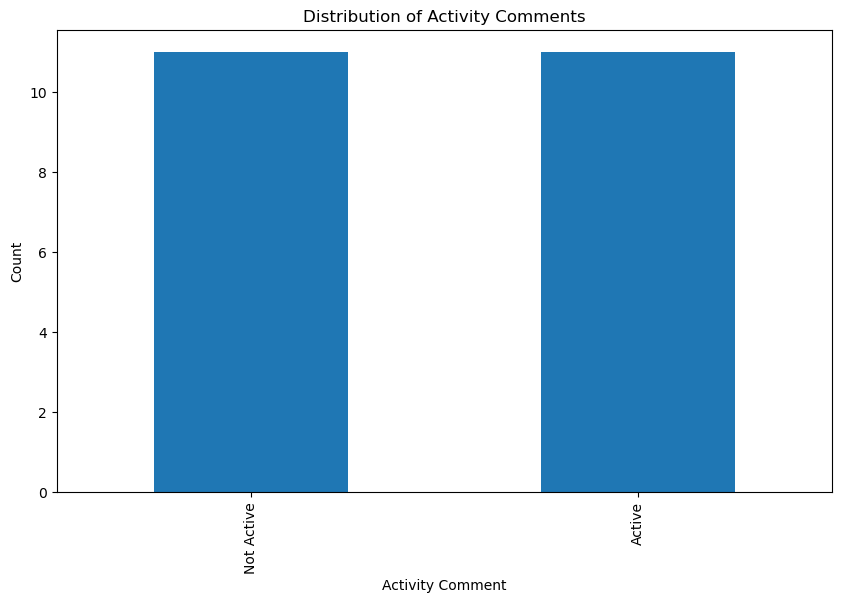

In [66]:
# Cell 3: Analyze activity data
activity_counts = df['activity_comment'].value_counts()
plt.figure(figsize=(10, 6))
activity_counts.plot(kind='bar')
plt.title('Distribution of Activity Comments')
plt.xlabel('Activity Comment')
plt.ylabel('Count')
plt.show()

In [67]:
# Cell 4: Explore assay descriptions
print("Unique assay descriptions:")
for desc in df['assay_description'].unique():
    print(f"- {desc}")

Unique assay descriptions:
- Activation of ClC-3 in human CNE2Z cells assessed as increase in chloride current in outward and inward direction at +80mV holding potential at 1 uM by whole-cell patch clamp method
- Activation of ClC-3 in SV40-transformed human NP69 cells assessed as increase in chloride current density at +80mV holding potential at 1 uM by whole-cell patch clamp method
- Activation of ClC-3 in human CNE2Z cells assessed as decrease in phosphorylation of Akt at Thr308 at 1 uM after 24 hrs by Western blot analysis in presence of ClC-3 siRNA
- Activation of ClC-3 in human CNE2Z cells assessed as decrease in phosphorylation of m-TOR at ser2481 at 1 uM after 24 hrs by Western blot analysis in presence of ClC-3 siRNA
- Activation of ClC-3 in human CNE2Z cells assessed as decrease in phosphorylation of m-TOR at ser2448 at 1 uM after 24 hrs by Western blot analysis in presence of ClC-3 siRNA
- Activation of ClC-3 in human CNE2Z cells assessed as decrease in m-TOR level at 1 uM a

In [68]:
# Cell 5: Analyze molecular properties
df['ROMol'] = df['canonical_smiles'].apply(lambda x: Chem.MolFromSmiles(x) if pd.notnull(x) else None)
df['MolWt'] = df['ROMol'].apply(lambda x: Descriptors.ExactMolWt(x) if x is not None else None)
df['LogP'] = df['ROMol'].apply(lambda x: Descriptors.MolLogP(x) if x is not None else None)
df['NumHDonors'] = df['ROMol'].apply(lambda x: Descriptors.NumHDonors(x) if x is not None else None)
df['NumHAcceptors'] = df['ROMol'].apply(lambda x: Descriptors.NumHAcceptors(x) if x is not None else None)
df['NumRotatableBonds'] = df['ROMol'].apply(lambda x: Descriptors.NumRotatableBonds(x) if x is not None else None)

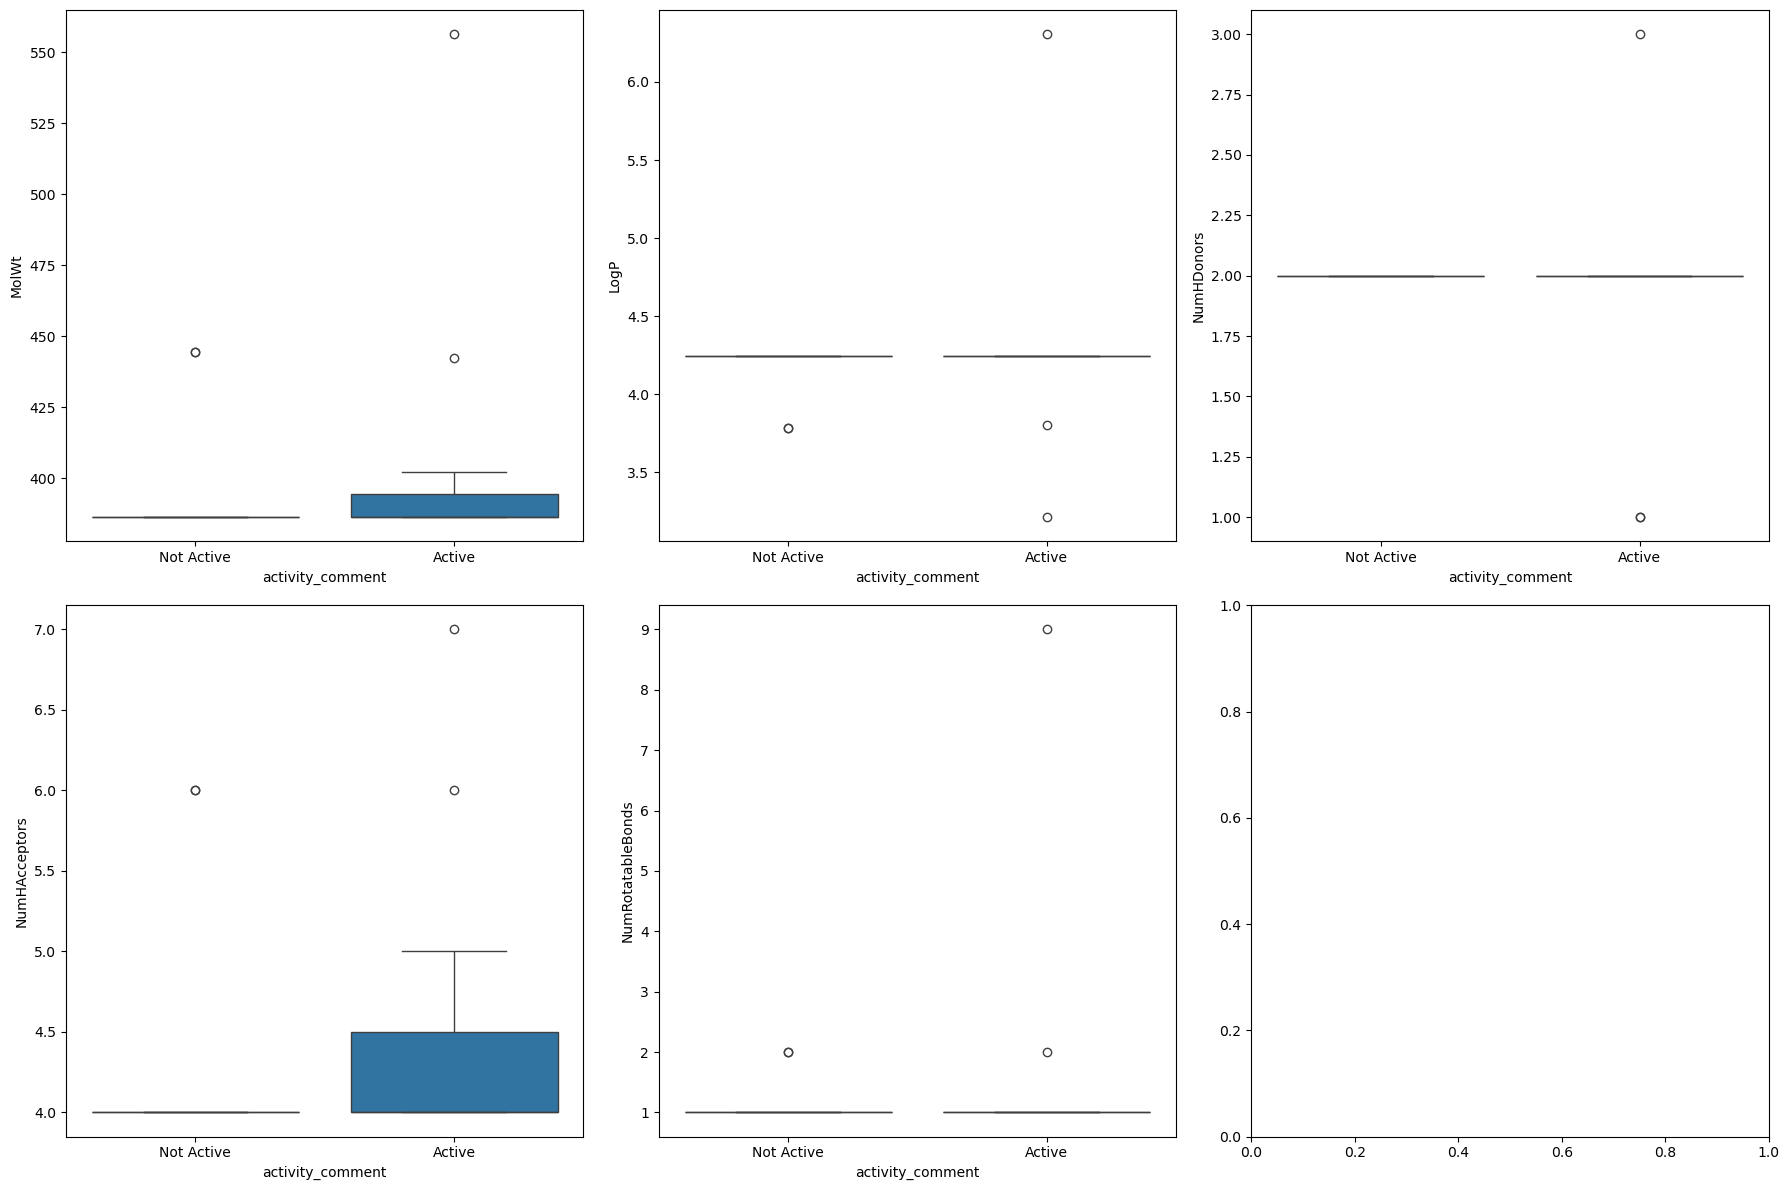

In [69]:
# Cell 6: Visualize molecular property distributions
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
sns.boxplot(x='activity_comment', y='MolWt', data=df, ax=axes[0, 0])
sns.boxplot(x='activity_comment', y='LogP', data=df, ax=axes[0, 1])
sns.boxplot(x='activity_comment', y='NumHDonors', data=df, ax=axes[0, 2])
sns.boxplot(x='activity_comment', y='NumHAcceptors', data=df, ax=axes[1, 0])
sns.boxplot(x='activity_comment', y='NumRotatableBonds', data=df, ax=axes[1, 1])
plt.tight_layout()
plt.show()

In [70]:
# Cell 7: Analyze 'FC' type data
fc_data = df[df['standard_type'] == 'FC']
print("FC type data:")
print(fc_data[['molecule_chembl_id', 'standard_value', 'standard_type', 'activity_comment']])

FC type data:
   molecule_chembl_id standard_value standard_type activity_comment
22       CHEMBL399680           17.0            FC             None


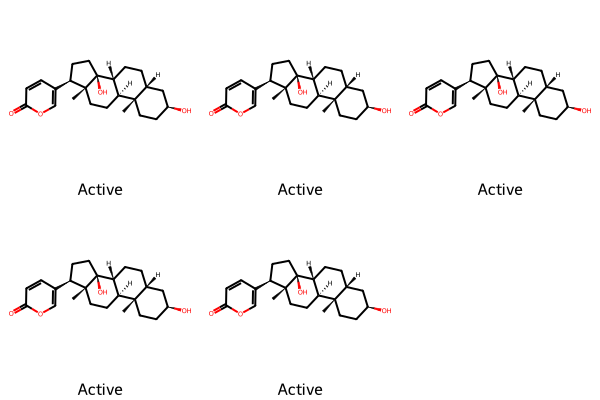

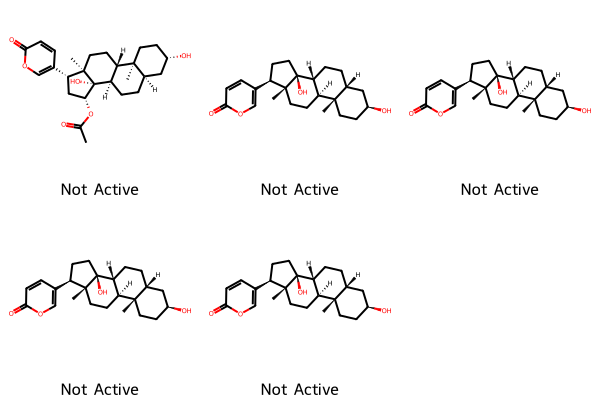

In [71]:
# Cell 8: Visualize compound structures
def visualize_compounds(df, activity_comment, n=5):
    compounds = df[df['activity_comment'] == activity_comment].head(n)
    mols = [Chem.MolFromSmiles(smiles) for smiles in compounds['canonical_smiles']]
    img = Draw.MolsToGridImage(mols, molsPerRow=3, subImgSize=(200,200), legends=[f"{activity_comment}"]*len(mols))
    display(img)

visualize_compounds(df, 'Active')
visualize_compounds(df, 'Not Active')

In [72]:
# Cell 9: Simple machine learning model
features = ['MolWt', 'LogP', 'NumHDonors', 'NumHAcceptors', 'NumRotatableBonds']
X = df[df['activity_comment'].isin(['Active', 'Not Active'])][features]
y = df[df['activity_comment'].isin(['Active', 'Not Active'])]['activity_comment']

In [73]:
# Cell 9: Simple machine learning model
features = ['MolWt', 'LogP', 'NumHDonors', 'NumHAcceptors', 'NumRotatableBonds']
X = df[df['activity_comment'].isin(['Active', 'Not Active'])][features]
y = df[df['activity_comment'].isin(['Active', 'Not Active'])]['activity_comment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Model Accuracy: 0.4

Classification Report:
              precision    recall  f1-score   support

      Active       0.00      0.00      0.00         3
  Not Active       0.40      1.00      0.57         2

    accuracy                           0.40         5
   macro avg       0.20      0.50      0.29         5
weighted avg       0.16      0.40      0.23         5



/home/cesco345/anaconda3/envs/rdkit-env_3_9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/cesco345/anaconda3/envs/rdkit-env_3_9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/cesco345/anaconda3/envs/rdkit-env_3_9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

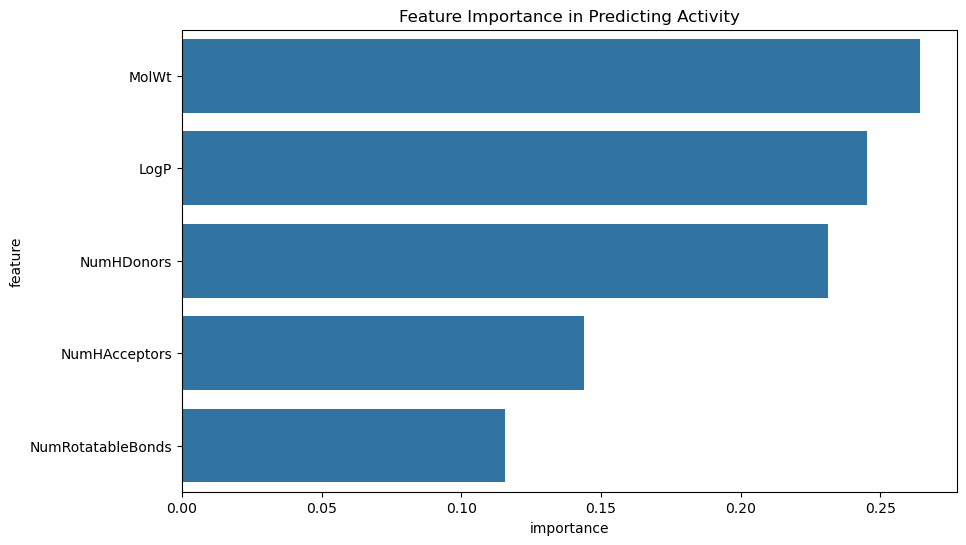

In [74]:
# Cell 10: Feature importance
feature_importance = pd.DataFrame({'feature': features, 'importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance in Predicting Activity')
plt.show()

# Analysis of CLC Inhibitors for Insights into Fluc Proteins

## 1. Introduction

In this notebook, we analyzed data on inhibitors of the H(+)/Cl(-) exchange transporter 3, a member of the CLC (Chloride Channel) family. Our goal was to gain insights that might be applicable to Fluc proteins, which are involved in fluoride export. This analysis was motivated by the structural and functional similarities between chloride and fluoride ions, and the potential for shared mechanisms in their transport across membranes.

## 2. Data Collection and Preprocessing

### Process:
- We queried the ChEMBL database for compounds associated with the H(+)/Cl(-) exchange transporter 3 (CHEMBL2401603).
- The dataset was loaded into a pandas DataFrame for analysis.
- ChEMBL is a curated database of bioactive molecules, providing high-quality data on compound-target interactions.
- The H(+)/Cl(-) exchange transporter 3 was chosen due to its role in chloride transport, which might share mechanistic similarities with fluoride transport in Fluc proteins.

## 3. Exploratory Data Analysis

### Process:
- We examined the structure of our dataset, including available columns and data types.
- We analyzed the distribution of activity comments (Active vs. Not Active).
- Understanding the dataset structure is crucial for proper analysis and interpretation.
- The binary classification of compounds as Active or Not Active provides a clear distinction for our analysis, albeit at the cost of nuanced activity information.

### Key Findings:
- The dataset contained 22 compounds, evenly split between Active and Not Active.
- Most data was categorical, with limited quantitative information.

## 4. Molecular Property Analysis

### Process:
- We calculated molecular properties such as molecular weight, LogP, number of H-bond donors/acceptors, and number of rotatable bonds using RDKit.
- We visualized the distribution of these properties for Active and Not Active compounds.
- These molecular properties are known to influence a compound's ability to interact with proteins and cross membranes.
- Comparing these properties between Active and Not Active compounds might reveal key features for inhibitor activity.

## 5. Structural Visualization

### Process:
- We generated 2D structures of Active and Not Active compounds using RDKit.
- Visual inspection of molecular structures can reveal structural motifs or functional groups that may be important for activity.
- This analysis can guide the design of potential Fluc inhibitors by identifying key structural features.

## 6. Machine Learning Model

### Process:
- We built a simple Random Forest classifier to predict compound activity based on molecular properties.
- The model was evaluated using accuracy and a classification report.
- Machine learning models can potentially identify complex relationships between molecular properties and activity.
- Random Forest was chosen for its ability to handle small datasets and provide feature importance rankings.

### Key Findings:
- The model performed poorly, with an accuracy of 0.4 and failure to correctly identify any Active compounds.
- This suggests that either the chosen features are not sufficiently predictive, or the dataset is too small for effective modeling.

## 7. Analysis of Assay Data

### Process:
- We examined the assay descriptions and types used to determine compound activity.
- Understanding the assay conditions is crucial for interpreting the activity data and its relevance to Fluc proteins.
- Different assay types may measure different aspects of inhibitor activity.

## 8. Conclusions and Implications for Fluc Proteins

- The analysis revealed challenges in using CLC inhibitor data to inform Fluc protein research, primarily due to limited data and the binary nature of activity classification.
- Structural analysis may be more informative than quantitative modeling given the current dataset.
- The poor performance of the machine learning model highlights the need for more data and potentially more sophisticated features to predict inhibitor activity.

## 9. Next Steps

1. **Expand the dataset**: 
   - Search for additional CLC inhibitor data from other subtypes or related proteins.
   - Consider including data on fluoride channel inhibitors, if available.

2. **Enhance structural analysis**: 
   - Perform more detailed analysis of structural features, possibly using 3D conformations.
   - Identify common scaffolds or pharmacophores among active compounds.

3. **Improve feature engineering**: 
   - Explore more advanced molecular descriptors or fingerprints that might better capture activity-relevant features.
   - Consider quantum mechanical descriptors for modeling electronic properties relevant to ion interactions.

4. **Utilize protein structure information**: 
   - If available, incorporate structural data on CLC proteins or Fluc proteins for docking studies or structure-based design.

5. **Literature review**: 
   - Conduct a comprehensive review of known CLC and Fluc inhibitors to identify key structural features and mechanisms of action.

6. **Collaborative research**: 
   - Engage with experimental researchers studying Fluc proteins to design targeted compounds based on insights from this analysis.

7. **Consider other computational approaches**: 
   - Explore pharmacophore modeling or fragment-based approaches that may be more suitable for limited datasets.

8. **Investigate ion specificity**: 
   - Analyze how structural features of inhibitors might contribute to specificity between chloride and fluoride ions.
